In [1]:
from typing import List
import math

import numpy as np
import torch
import matplotlib.pyplot as plt

from language_models.transformers_lm import TransformersLM
from token_samplers import PureSampling, GreedyDecoding, TopKSampling, TopPSampling, Mirostat
from decoding import decoding, DecodingOutput


def get_surprisals(logits: torch.Tensor, ids: torch.Tensor) -> List[float]:
    surprisals = []
    for score, id_ in zip(logits, ids):
        surprisal = -torch.log_softmax(score, dim=0)[id_] * (1 / math.log(2.0))  # convert base e to 2
        surprisals.append(surprisal.item())
    return surprisals

def smooth_values(x: np.ndarray, window: int = 1) -> np.ndarray:
    y = np.ones(window)
    z = np.ones(len(x))
    smoothed_x = np.convolve(x, y, "same") / np.convolve(z, y, "same")
    return smoothed_x

def plot_surprisals(decoding_output: DecodingOutput):
    for logits, ids in zip(decoding_output.logits, decoding_output.ids):
        surprisals = get_surprisals(logits, ids)
        surprisals = smooth_values(surprisals, window=100)
        plt.plot(surprisals)

In [2]:
model_name = "rinna/japanese-gpt2-medium"
language_model = TransformersLM(model_name, device=torch.device("cpu"))

In [3]:
context_text = "シャノンは第2次大戦中に、英国アラン・チューリングと音声通信の暗号化に取り組み、" \
             "米国における暗号理論と人工知能の研究に先鞭をつけた。シャノンは電信電話の時代に、" \
             "情報を統計分析に基づいてサンプリングすることにより、帯域幅が拡大するにつれてCD、DVD、デジタル放送が可能になり、" \
             "インターネット上でマルチメディアの世界が広がることを理論的に示していた。"

Pure sampling

In [4]:
token_sampler = PureSampling()

decoding_output = decoding(
    language_model,
    token_sampler = token_sampler,
    context_text = context_text,
    batch_size = 4,
    max_num_tokens=100
)

In [5]:
decoding_output.text

['シャノンが書いた理論は彼が苦労しながらも作ったものを基にしており、「分離を重んじる」講義のコンセプトの今もそのまま引き継がれている。 レッドハウスのエグゼスセミナーについては音源(シャーウッド・インスティテュート内にある「シャノンのライブラリ」から商用音源(有料)を購入することが可能。「受講申込書」の必要事項を記入のうえ、シャノンまで送付。返却を希望する場合はシャノンまで請求下さい。お支払いは郵便振替でも可能',
 'また、通信や放送などの影響で、身近にあるネットワークやインターネットといったネットワークの、2011年時点で格段に密になり、ますますそのうちビジネスものはさらに複雑化・高度化し、データを扱えるコンピュータネットワークはますます重要になることを指摘した。 シスコは、多数の大規模システム(エンタープライズクラス)を管理し、そのマネジメントを提供している。エンタープライズクラスの中には、電話やlanなどの情報をさまざまなデバイス間が持つように考慮した製品もある。「ネットワーク」部門は、ネットワークでの「記憶装置」と呼ばれる情報をブロックあるいは',
 'また、音声の原音に影響を与えるプロセッシングによる解除方法も考案しており、音声バイブレーションも考案した(児島寿美子)。しかし、このようなデータ分離の上からも、音声の符号化と純粋ビットを分離して出力する場合に比べて、より周波数的にも極めて正確である。欠点があるとすれば、圧縮率の問題であり、例えばテープの1メガバイトから800万バイトまでの数パーセントのビットでは、ほぼ100%のビットが圧縮されずに残される。また、再圧縮',
 'マイク・シノダとマイク・スナイダーの共著『心理社会的パターンの言語学―言語が自在に書くという方法』の中では、人間とコンピュータ間に起こる欲求とは不変ではなく、万能ではないこと、人は普遍的なものでない、というものを述べている。 シャノンがレムナント・マイクロ・ディジタルに注目するのは、人間とコンピュータ間の複雑な経験的相互作用の全般にわたる性質である。シャノンが研究してきた、実際に人間の欲求がどのようにコンピュータ上に現れるか']

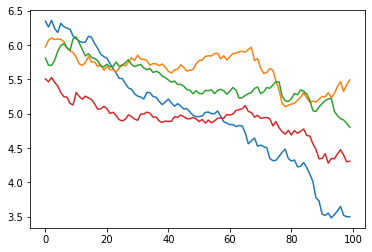

In [6]:
plot_surprisals(decoding_output)

Mirostat

In [7]:
token_sampler = Mirostat(target_surprisal=3.0)

decoding_output = decoding(
    language_model,
    token_sampler = token_sampler,
    context_text = context_text,
    batch_size = 4,
    max_num_tokens=100
)

In [8]:
decoding_output.text

['シャノンの通信プロトコルはitu-tによって標準化されており、それは、itu-tコードの標準化と、itu-tの仕様書に記載されているitu-tコードの標準化である。1999年1月に発行されたitu-tコードの公式な日本語訳は、iso z 9010である。 itu-tの編集者であるアラン・チューリングは、次のように述べている。「ciaのコンピューターネットワークの通信プロトコルは標準化されており、itu-t規格により標準化されているので、itu',
 'シャノンは、1950年代初めに、音声信号の符号化方式を改良するための研究を開始した。この研究は、当初「音声信号を符号化する」という目的のために始められた。この研究は、この目的を達成する上で重要な役割を果たした。 この研究は、音声信号のサンプリングの方法に関する、最初の実用的研究であった。この研究の目的は、音声信号の振幅と位相を測定することに特化し、音声信号の振幅と位相を調査して、いくつかの信号の周波数特性を測定することであった。同時に、',
 'しかし、シャノンはこの理論の実現は、まだ先のことだと考えており、「我々は、この理論を実現できるのは、まだまだ先だと信じている」と述べた。 しかし、当時からシャノンは、通信の暗号化は、暗号化された音声データを、通信の暗号化を解除する手段に利用するという、通信の暗号化を解除する手段の1つに過ぎないと考えており、そうではない通信の暗号化を無効化して通信の暗号化を解除する手段や、通信の暗号化を',
 'シャノンは、そんなシャノンの思いに共感した友人や、その友人が所属するグループが、シャノンの考えを実現するために、シャノンが開発した暗号理論を、応用して、暗号通信の高速化と、通信の安全性の向上に役立てようと、研究を開始した。 シャノンが開発した技術が、通信の安全性を高めることに貢献できたことは、シャノン自身による貢献が大きい。 シャノンが開発に関わってきた技術は、通信の安全性を高めるという点で価値あるものだった']

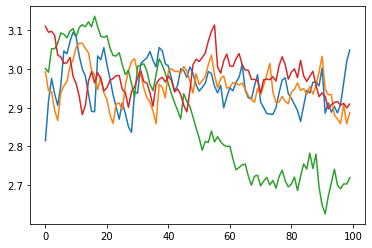

In [9]:
plot_surprisals(decoding_output)